In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as sm

from statsmodels.tsa import tsatools
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from datetime import datetime

In [3]:
#Reads data from excel file in dataframe
prod_df = pd.read_excel('C:/Users/Megan/Documents/HumberCourseOutline/Sem4/MachineLearning2/Assignment2/Product Demand.xlsx')
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Product_Code      1048575 non-null  object 
 1   Warehouse         1048575 non-null  object 
 2   Product_Category  1048575 non-null  object 
 3   Date              1037336 non-null  object 
 4   Order_Demand      1048575 non-null  float64
dtypes: float64(1), object(4)
memory usage: 40.0+ MB


In [4]:
#Removes rows with NAN
prod_df2=prod_df.dropna()

In [5]:
prod_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1037335
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Product_Code      1037336 non-null  object 
 1   Warehouse         1037336 non-null  object 
 2   Product_Category  1037336 non-null  object 
 3   Date              1037336 non-null  object 
 4   Order_Demand      1037336 non-null  float64
dtypes: float64(1), object(4)
memory usage: 47.5+ MB


In [6]:
#Remove the dates 2015-02-29 and 2019-02-29 as February does not have 29 days in these years
filtered_df = prod_df2.loc[(prod_df2['Date'] != '2015-02-29') & (prod_df2['Date'] != '2019-02-29')]

In [7]:
#Displays information about the table and the data type
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035585 entries, 0 to 1037335
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Product_Code      1035585 non-null  object 
 1   Warehouse         1035585 non-null  object 
 2   Product_Category  1035585 non-null  object 
 3   Date              1035585 non-null  object 
 4   Order_Demand      1035585 non-null  float64
dtypes: float64(1), object(4)
memory usage: 47.4+ MB


In [8]:
#Save cleaned data to a csv file
#filtered_df.to_csv('prodClean.csv', index=False) 

In [9]:
#Used to convert the Date column to datetime data type and store the results in a new column
filtered_df.loc[:, 'NC2'] = pd.to_datetime(filtered_df['Date'])

C:\Users\Megan\AppData\Local\Temp\ipykernel_5112\813819857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'NC2'] = pd.to_datetime(filtered_df['Date'])


In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035585 entries, 0 to 1037335
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1035585 non-null  object        
 1   Warehouse         1035585 non-null  object        
 2   Product_Category  1035585 non-null  object        
 3   Date              1035585 non-null  object        
 4   Order_Demand      1035585 non-null  float64       
 5   NC2               1035585 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 55.3+ MB


In [11]:
#Removes the Date column with an object data type
filtered_df = filtered_df.drop('Date', axis=1)

In [12]:
#Renames column that contains date as datetime data type to date
filtered_df.rename(columns={'NC2':'Date'}, inplace=True)

In [13]:
filtered_df

,Product_Code,Warehouse,Product_Category,Order_Demand,Date
0,Product_0965,St john's,Category_006,2.0,2014-01-08
1,Product_1724,St john's,Category_003,108.0,2014-05-31
2,Product_1521,Surrey,Category_019,85000.0,2014-06-24
3,Product_1521,Surrey,Category_019,7000.0,2014-06-24
4,Product_1507,Oshawa,Category_019,1250.0,2014-09-02
...,...,...,...,...,...
1037331,Product_1954,Brampton,Category_001,3.0,2017-01-06
1037332,Product_1710,Brampton,Category_026,15.0,2017-01-06
1037333,Product_1904,Oshawa,Category_019,4000.0,2017-01-09
1037334,Product_0250,Oshawa,Category_007,148.0,2017-01-09


In [69]:
#Filters the column needed for the first analysis
filtered2 = filtered_df[['Order_Demand','Date']]

What is the projected total order demand for 2020 for all warehouses summed?

In [70]:
#Using Central Moving Average
#Calculates the CMA for the order_demand grouped by year
cma_df=filtered2.groupby(pd.Grouper(key='Date', freq='Y'))
cma2_df = cma_df.sum()
cma2_df=cma2_df.sort_values('Date')

cma2_df['CMA'] = cma2_df['Order_Demand'].rolling(window=3).mean()
cma2_df = cma2_df.reset_index()
fdate = {'Date': '2020-12-31'}
cma2_df = cma2_df.append(fdate, ignore_index=True)

cma2_df['CMA']=pd.Series(cma2_df['CMA'][:-1].values, index=cma2_df.index[1:])
cma2_df.loc[:, 'Date'] = pd.to_datetime(cma2_df['Date'])
cma2_df

C:\Users\Megan\AppData\Local\Temp\ipykernel_5112\331242870.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cma2_df = cma2_df.append(fdate, ignore_index=True)
C:\Users\Megan\AppData\Local\Temp\ipykernel_5112\331242870.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cma2_df.loc[:, 'Date'] = pd.to_datetime(cma2_df['Date'])


,Date,Order_Demand,CMA
0,2014-12-31,8.363894e+06,NaN
1,2015-12-31,9.458575e+08,NaN
2,2016-12-31,1.014088e+09,NaN
3,2017-12-31,1.071473e+09,6.561031e+08
4,2018-12-31,1.099398e+09,1.010473e+09
5,2019-12-31,4.619423e+08,1.061653e+09
6,2020-12-31,NaN,8.776047e+08


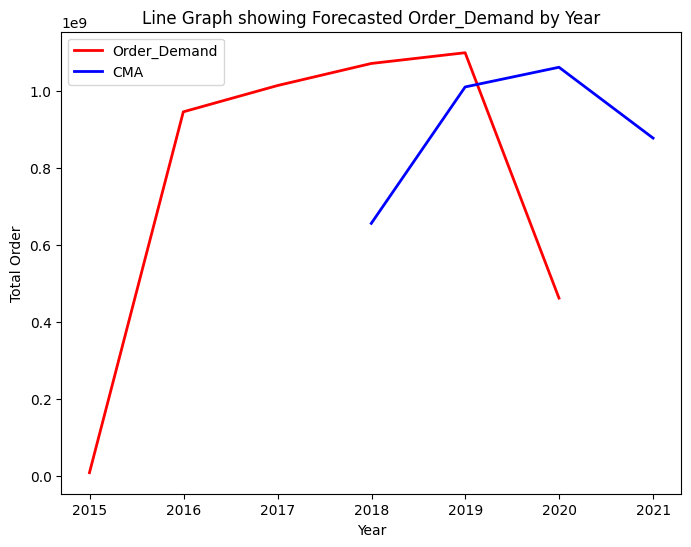

In [76]:
#Plots a line graph of Date against Total_Order
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(cma2_df['Date'], cma2_df['Order_Demand'], color='red', linewidth=2, label='Order_Demand')
ax.plot(cma2_df['Date'], cma2_df['CMA'], color='blue', linewidth=2, label='CMA')

ax.set_xlabel('Year')
ax.set_ylabel('Total Order')
ax.set_title('Line Graph showing Forecasted Order_Demand by Year')

ax.legend()
plt.show()

In [74]:
#Filters the column needed for the second analysis
filtered3 = filtered_df[['Order_Demand','Warehouse','Date']]

In [75]:
filtered3

,Order_Demand,Warehouse,Date
0,2.0,St john's,2014-01-08
1,108.0,St john's,2014-05-31
2,85000.0,Surrey,2014-06-24
3,7000.0,Surrey,2014-06-24
4,1250.0,Oshawa,2014-09-02
...,...,...,...
1037331,3.0,Brampton,2017-01-06
1037332,15.0,Brampton,2017-01-06
1037333,4000.0,Oshawa,2017-01-09
1037334,148.0,Oshawa,2017-01-09


In [ ]:
What is the projected total order demand for each Warehouse by year?

In [80]:
#Using Central Moving Average
#Calculates the CMA for the order_demand grouped by year for each Warehouse

cma_df3 = filtered3.groupby([pd.Grouper(key='Date', freq='Y'),'Warehouse']).agg({'Order_Demand': 'sum'}).unstack()
cma_df4 = filtered3.groupby([pd.Grouper(key='Date', freq='Y')]).sum()
cma_df4

dateCMA = cma_df4.reset_index()
warehouseCMA = cma_df3.reset_index(drop=True)
result = pd.concat([dateCMA, warehouseCMA['Order_Demand']], axis=1)
x = result.rolling(window=3).mean()
y = x.reset_index(drop=True)
fCMA = pd.concat([dateCMA.drop('Order_Demand', axis=1), y.drop(['Order_Demand'], axis=1)], axis=1)
fdate2 = {'Date': '2020-12-31'}
fCMA = fCMA.append(fdate2, ignore_index=True)

fCMA['Brampton']=pd.Series(fCMA['Brampton'][:-1].values, index=fCMA['Brampton'].index[1:])
fCMA['Surrey']=pd.Series(fCMA['Surrey'][:-1].values, index=fCMA['Surrey'].index[1:])
fCMA['Oshawa']=pd.Series(fCMA['Oshawa'][:-1].values, index=fCMA['Oshawa'].index[1:])
fCMA['St john\'s']=pd.Series(fCMA['St john\'s'][:-1].values, index=fCMA['St john\'s'].index[1:])
fCMA.loc[:, 'Date'] = pd.to_datetime(fCMA['Date'])

print(fCMA)

        Date      Brampton        Oshawa     St john's        Surrey
0 2014-12-31           NaN           NaN           NaN           NaN
1 2015-12-31           NaN           NaN           NaN           NaN
2 2016-12-31           NaN           NaN           NaN           NaN
3 2017-12-31  4.262928e+08  6.956527e+07  1.927937e+07  1.409657e+08
4 2018-12-31  6.583566e+08  1.084275e+08  2.903821e+07  2.146506e+08
5 2019-12-31  6.870348e+08  1.182811e+08  2.945742e+07  2.268799e+08
6 2020-12-31  5.856166e+08  1.008412e+08  1.092553e+07  1.802213e+08


C:\Users\Megan\AppData\Local\Temp\ipykernel_5112\3793875771.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cma_df4 = filtered3.groupby([pd.Grouper(key='Date', freq='Y')]).sum()
C:\Users\Megan\AppData\Local\Temp\ipykernel_5112\3793875771.py:11: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  x = result.rolling(window=3).mean()
C:\Users\Megan\AppData\Local\Temp\ipykernel_5112\3793875771.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fCMA = fCMA.append(fdate2, ignore_index=True)
C:\Users\Megan\AppData\Local\Temp\ip

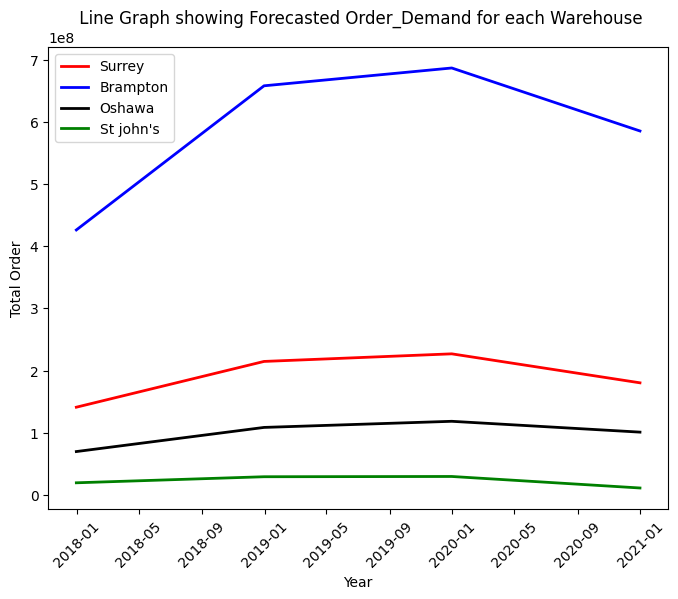

In [88]:
#Plots a line graph of Date against Total_Order for each Warehouse

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(fCMA['Date'], fCMA['Surrey'], color='red', linewidth=2, label='Surrey')
ax.plot(fCMA['Date'], fCMA['Brampton'], color='blue', linewidth=2, label='Brampton')
ax.plot(fCMA['Date'], fCMA['Oshawa'], color='black', linewidth=2, label='Oshawa')
ax.plot(fCMA['Date'], fCMA['St john\'s'], color='green', linewidth=2, label='St john\'s')

ax.set_xlabel('Year')
ax.set_ylabel('Total Order')
ax.set_title(' Line Graph showing Forecasted Order_Demand for each Warehouse')
plt.xticks(rotation=45)

ax.legend()
plt.show()

In [48]:
print(test1)

In [13]:
#covert to time series
filtered_ts = pd.Series(filtered_df.Order_Demand.values, index=filtered_df.Date, name='Order_Total')

#Define the time series frequency
#totals = filtered_ts.groupby(pd.Grouper(key='Date', freq='Y'))['Order_Demand'].sum()
filtered_ts.index=pd.DatetimeIndex(filtered_ts.index, freq=filtered_ts.index.inferred_freq)

In [40]:
od_centered = filtered_ts.rolling(12, center=True).mean()

In [41]:
od_trailing = filtered_ts.rolling(12).mean()

In [43]:
od_centered=pd.Series(od_centered[:-1].values, index=od_centered.index[1:])
od_trailing=pd.Series(od_trailing[:-1].values, index=od_trailing.index[1:])

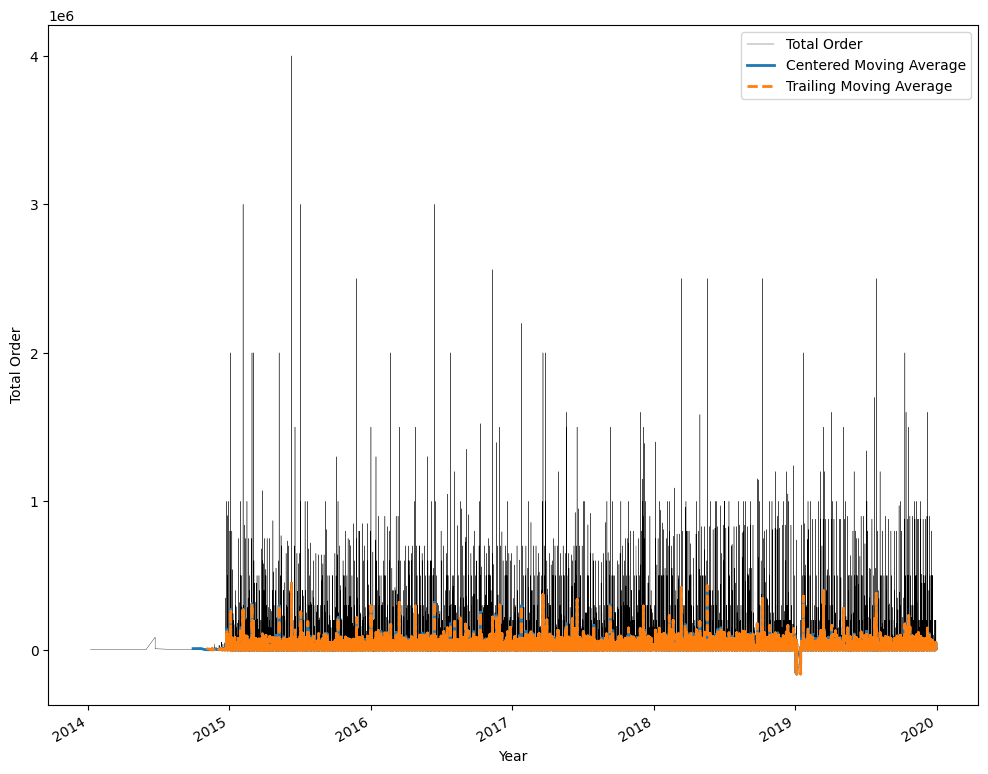

In [45]:
fig, ax = plt.subplots(figsize=(12,10))
ax = filtered_ts.plot(ax=ax, color='black', linewidth=0.25)
od_centered.plot(ax=ax, linewidth=2)
od_trailing.plot(ax=ax, style='--', linewidth=2)
ax.set_xlabel('Year')
ax.set_ylabel('Total Order')
ax.legend(['Total Order','Centered Moving Average','Trailing Moving Average'])
plt.show()

NameError: name 'Order_Demand' is not defined

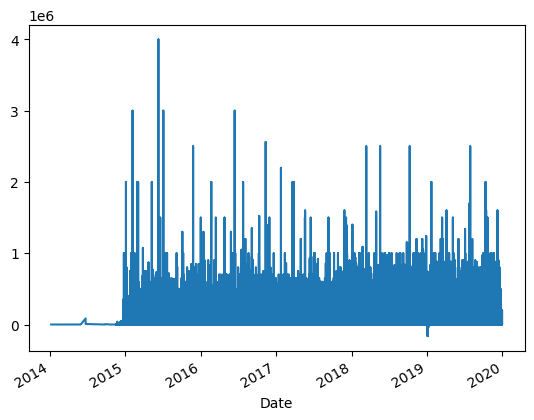

In [39]:
#Plot the time series
ax = filtered_ts.plot()
grouped = filtered_df.groupby(['Warehouse', pd.Grouper(key='Date', freq='Y')])

for year, ygroup in grouped:
    for group, group_d in ygroup.groupby('Warehouse'):
        #if a == 'Surrey':
        plt.plot(group_d['Date'], group_d['Order_Demand'], label=f'{Order_Demand}-{year.year}')
    
ax.set_xlabel('Year')
ax.set_ylabel('Total Demand')
ax.set_ylim(-300000, 5000000)

plt.legend()
plt.show()

In [ ]:
# partition the data
nValid = 36
nTrain = len(ridership_ts) - nValid
train_ts = ridership_ts[:nTrain]
valid_ts = ridership_ts[nTrain:]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))
ax = plt.plot((filtered_df['Date'],filtered_df['Order_Demand']), color='black',  linewidth=0.25)
#plt.plot(df['Date'], df['Demand'])

ax.set_xlabel('Year')
ax.set_ylabel('Demand')
plt.show()